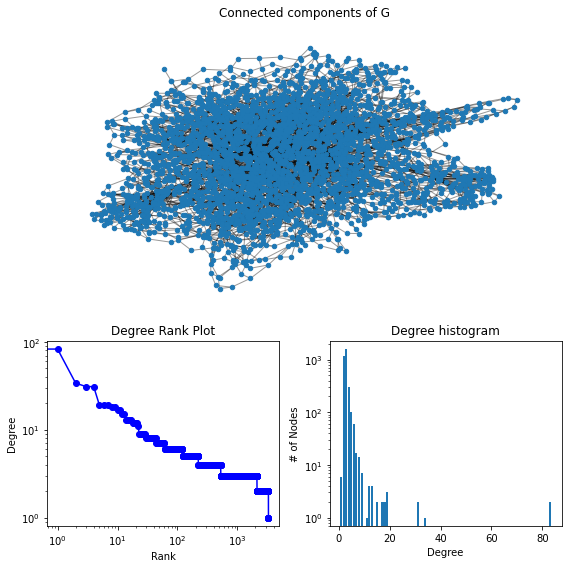

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

with open("/data/guangyuh/coding_env/AIG2INV/AIG2INV_main/train_gcn/dataset_hwmcc2007_tip_ic3ref_no_simplification_0-22.pickle", "rb") as f:
        data = pickle.load(f)
# random number generator
random_graph_index = random.randint(0, len(data))
G, node_features, node_labels, train_mask = data[random_graph_index]
#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
#log scale
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
#log scale
ax2.set_yscale("log")

fig.tight_layout()
plt.show()